In [66]:
%matplotlib inline
import random
import torch
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 线性回归的从零开始实现

## 线形回归的基本元素

### 线形模型

- 假设数据集有$d$个特征，对于第$i$个样本，特征为集合$\{x_{1}^{(i)},x_{2}^{(i)},\cdots,x_{d}^{(i)}\}$，则该样本的预测结果$\hat{y}^{(i)}$可以表示为

$$
\hat{y}^{(i)}=w_1x_{1}^{(i)}+w_2x_{2}^{(i)}+\cdots+w_dx_{d}^{(i)}+b
\label{eq:lineareqn}
$$

- 第$i$个样本的所有特征用向量$\boldsymbol{x}_i\in\mathbb{R}^d$表示，所有权重用向量$\boldsymbol{w}\in \mathbb{R}^d$表示，则式\eqref{eq:lineareqn}可用向量表示为

$$
\hat{y}^{(i)}=\boldsymbol{w}^T\boldsymbol{x}^{(i)}+b
\label{eq:linearvec}
$$

- 全部数据集（含有$n$个样本）的特征用矩阵$\mathbf{X}\in\mathbb{R}^{n\times d}$表示，所有样本的预测值用向量$\hat{\boldsymbol{y}}\in\mathbb{R}^n$表示，则线性模型可表示为

$$
\hat{\boldsymbol{y}}=\mathbf{X}\boldsymbol{w}+b 
\label{eq:linearmatrix}
$$

- 线性模型的目标是求解**模型参数**（model parameters）
    - $\boldsymbol{w}$
    - $b$

### 损失函数

\begin{definition}\label{def:lossfun}
损失函数（loss function）：量化目标的实际值与预测值之间的差距。
\end{definition}

- 通常选择**非负数**作为损失，且**数值越小表示损失越小**，完美预测时的损失为0

- 对于线形模型\eqref{eq:linearvec}，真实值为$y^{(i)}$，预测值为$\hat{y}^{(i)}$，可以用**平方误差**函数作为损失函数

$$l^{(i)}(\boldsymbol{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.$$

- 为度量模型在整个数据集上的质量，需计算在训练集$n$个样本上的损失均值，即

$$L(\boldsymbol{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\boldsymbol{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\boldsymbol{w}^\top \boldsymbol{x}^{(i)} + b - y^{(i)}\right)^2.$$

- 线形模型\eqref{eq:linearmatrix}的优化目标为

$$\boldsymbol{w}^*, b^* = \operatorname*{argmin}_{\boldsymbol{w}, b}\  L(\boldsymbol{w}, b).
\label{eq:linearobj}
$$

### 随机梯度下降，求解式\eqref{eq:linearobj}

\begin{definition}\label{def:gradientdescent}
**梯度下降**（gradient descent）：通过不断地在损失函数递减的方向上更新参数来降低误差。
\end{definition}


- 计算损失函数（数据集中所有样本的损失均值）关于模型参数的导数（在这里也可以称为梯度）
- 但需遍历整个数据集，执行速度慢

\begin{definition}\label{def:minibatchdescent}
**小批量随机梯度下降**（minibatch stochastic gradient descent）：在每次需要计算更新的时候随机抽取一小批样本计算损失函数的梯度，更新参数。
\end{definition}


- 首先，随机抽样一个小批量$\mathcal{B}$，它是由**固定数量**的训练样本组成的。
- 然后，计算小批量的平均损失关于模型参数的导数（也可以称为梯度）。
- 最后，将梯度乘以一个预先确定的正数$\eta$，并从当前参数的值中减掉。

$$(\boldsymbol{w},b) \leftarrow (\boldsymbol{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\boldsymbol{w},b)} l^{(i)}(\boldsymbol{w},b).$$

上式中，$|\mathcal{B}|$表示每个小批量中的样本数，称为**批量大小**（batch size），$\eta$表示**学习率**（learning rate）。

\begin{definition}\label{def:hyperpara}
**超参数**（hyperparameter）：可以调整但不在训练过程中更新的参数。
\end{definition}


\begin{definition}\label{def:tuning}
**调参**（hyperparameter tuning）：选择超参数的过程。
\end{definition}


### 线性模型的神经网络表达

- 线性回归可表示成一个**单层神经网络**

<center><img src="../img/3_linear_network/singleneuron.svg" width=80%></center>

\begin{definition}\label{def:denseLayer}
**全连接层**（fully-connected layer）：每个输入都与每个输出相连，或称为**稠密层**（dense layer）。
\end{definition}


## 生成样本数据

根据带有噪声的线性模型构造一个人造数据集。使用线性模型参数$\boldsymbol{w} = [2, -3.4]^\top$、$b = 4.2$
和噪声项$\varepsilon$生成数据集及其标签：

$$\boldsymbol{y}= \mathbf{X} \boldsymbol{w} + b + \boldsymbol{\varepsilon}$$

其中，$\varepsilon$服从均值为0的正态分布，不妨将其标准差设为0.01。

In [21]:
def synthetic_data(w, b, num_examples):  
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape) # y.shape: torch.Size([1000,1])
    return X, y # y.shape: torch.Size([1000, 1])

```python
torch.normal(mean, std, size, *, out=None)
```
- 生成正态分布的张量
- `size`：由整数构成的元祖，定义生成的张量的形状

In [22]:
true_w = torch.tensor([2, -3.4]).reshape((-1,1))  #变成列向量
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

- `features`中的每一行都包含一个二维数据样本，`labels`中的每一行都包含一维标签值（一个标量）

In [23]:
print(f'features: {features[0]} \nlabel: {labels[0]}')

features: tensor([1.3937, 0.4697]) 
label: tensor([5.3929])


- 绘制散点图观察特征与标签之间的关系

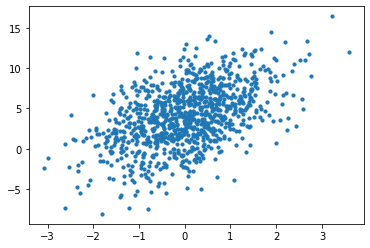

In [28]:
plt.scatter(features[:, (0)].numpy(), labels.numpy(),s=10)

## 读取数据集

- 定义一个函数，能**打乱数据集中的样本顺序**并以小批量方式获取数据

- 定义一个`data_iter`函数，该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为`batch_size`的小批量

In [32]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)            # 获取数据集的样本数量
    indices = list(range(num_examples))     # 生成位置列表
    random.shuffle(indices)                 # 对数据随机排序
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])   # 记录抽取的数据位置
        yield features[batch_indices], labels[batch_indices] # 用yield关键字生成一个iterator

In [33]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(f'X为{X}\ny为{y}')
    break

X为tensor([[-0.4471,  0.4029],
        [ 0.7657, -0.4713],
        [ 0.2101, -1.3732],
        [-1.3949,  0.5373],
        [-0.8662, -0.8761],
        [-0.4696,  0.0054],
        [ 0.4594,  0.5837],
        [ 2.7690,  0.2098],
        [ 0.3587, -1.4239],
        [ 0.0238, -0.8170]])
y为tensor([[ 1.9385],
        [ 7.3325],
        [ 9.2775],
        [-0.4222],
        [ 5.4489],
        [ 3.2386],
        [ 3.1290],
        [ 9.0340],
        [ 9.7566],
        [ 7.0458]])


## 初始化模型参数

- 通过从均值为0、标准差为0.01的正态分布中采样随机数来初始化权重
- 将偏置初始化为0

In [29]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)  # 记录偏导数
b = torch.zeros(1, requires_grad=True)

## 定义模型

- 将模型的输入和参数同模型的输出关联起来

In [30]:
def linreg(X, w, b):  # net
    """线性回归模型"""
    return torch.matmul(X, w) + b

## 定义损失函数

In [31]:
def squared_loss(y_hat, y):
    """均方损失
    y_hat：预测值
    y：真值
    """   
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2  # 将y转换为与y_hat相同的形状

## 定义优化算法

- 实现小批量随机梯度下降算法

In [34]:
def sgd(params, lr, batch_size):  # params: [w,b]
    """小批量随机梯度下降
    lr：学习速率
    """
    with torch.no_grad(): # 在该上下文管理器下，所有计算得出的tensor的requires_grad都自动设置为False。
        for param in params:
            param -= lr * param.grad / batch_size  # 更新参数，学习速率lr控制更新大小，批量大小batch_size规范化步长
            param.grad.zero_() # 为什么要将梯度置零？

```python
torch.no_grad
```
- 上下文管理器（context manager），使梯度计算失效。当不需要使用`Tensor.backward()`的时候，使梯度计算失效可以节省计算梯度占用的内存
- 即使输入的`requires_grad=True`，利用该上下文管理器后，计算出来的`Tensor`的`requires_grad=False`

## 正式开始训练

- 训练的流程
    * 初始化参数
    * 重复以下训练，直到完成
        * 读取批量数据，获得预测，计算损失
        * 计算梯度$\mathbf{g} \leftarrow \partial_{(\boldsymbol{w},b)} \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} l(\mathbf{x}^{(i)}, y^{(i)}, \boldsymbol{w}, b)$
        * 更新参数$(\boldsymbol{w}, b) \leftarrow (\boldsymbol{w}, b) - \eta \mathbf{g}$

\begin{definition}\label{def:epoch}
**迭代周期**（epoch）：使用训练集的全部数据对模型进行一次完整训练，也被称为**一代训练**
\end{definition}


- 在每个迭代周期（epoch）中，使用data_iter函数遍历整个数据集， 并将训练数据集中所有样本都使用一次（假设样本数能够被批量大小整除）

- 训练流程

<center><img src="../img/3_linear_network/epochMiniBatchTraining.svg" width=55%></center>

In [37]:
lr = 0.01  # 超参
num_epochs = 5  # 超参
net = linreg    # 实例回归模型
loss = squared_loss # 实例损失函数

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):    # 遍历全部数据集
        l = loss(net(X, w, b), y)                           # net(X,w,b)预测，loss(net,y)计算损失
        l.sum().backward()                                  # 反向传播计算参数的梯度（偏导数）
        sgd([w, b], lr, batch_size)                         # 更新参数
    with torch.no_grad(): 
        train_l = loss(net(features, w, b), labels)         # 一个epoch输出一次优化的参数与损失
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.009596
epoch 2, loss 0.001577
epoch 3, loss 0.000296
epoch 4, loss 0.000089
epoch 5, loss 0.000057


比较真实参数和通过训练学到的参数

In [38]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([[ 0.0015],
        [-0.0029]], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0016], grad_fn=<RsubBackward1>)
